In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
samples = 1000
data = [float(i)*0.01 for i in range(-samples, samples)]
label = [1 if i > 2.5 else 0 for i in data]

#print(data[:10], data[-10:])
#print(label[:10], label[-10:])
#print(len(data), len(label))

[-10.0, -9.99, -9.98, -9.97, -9.96, -9.950000000000001, -9.94, -9.93, -9.92, -9.91] [9.9, 9.91, 9.92, 9.93, 9.94, 9.950000000000001, 9.96, 9.97, 9.98, 9.99]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0] [1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
2000 2000


In [3]:
x = tf.placeholder(tf.float32)
y_ = tf.placeholder(tf.float32)

w = tf.Variable(0, dtype=tf.float32)
b = tf.Variable(0, dtype=tf.float32)

y = w*x + b

pred = tf.nn.sigmoid(y) #실제 예측 값

loss = tf.losses.sigmoid_cross_entropy(y_, y) #실제 값과 예측 값 차
train_op = tf.train.GradientDescentOptimizer(1e-2).minimize(loss)

INFO:tensorflow:logits.dtype=<dtype: 'float32'>.
INFO:tensorflow:multi_class_labels.dtype=<dtype: 'float32'>.
INFO:tensorflow:losses.dtype=<dtype: 'float32'>.


loss:  0.693147
prediction:  [ 0.44137895  0.44143674  0.44149452 ...,  0.55782872  0.55788648
  0.5579443 ]
loss:  0.226943
prediction:  [ 0.005665    0.00569351  0.00572216 ...,  0.99270815  0.99274457
  0.99278086]
loss:  0.204041
prediction:  [ 0.00186703  0.00187835  0.00188973 ...,  0.99699533  0.99701345
  0.99703133]
loss:  0.190745
prediction:  [ 0.00101717  0.00102385  0.00103058 ...,  0.99798453  0.9979977
  0.99801081]
loss:  0.180339
prediction:  [  6.76695840e-04   6.81356410e-04   6.86048763e-04 ...,   9.98370588e-01
   9.98381734e-01   9.98392761e-01]
loss:  0.171513
prediction:  [  4.96712339e-04   5.00243157e-04   5.03798772e-04 ...,   9.98563468e-01
   9.98573542e-01   9.98583555e-01]
loss:  0.163812
prediction:  [  3.84454062e-04   3.87252920e-04   3.90072120e-04 ...,   9.98678625e-01
   9.98688161e-01   9.98697639e-01]
loss:  0.157008
prediction:  [  3.06645379e-04   3.08923045e-04   3.11217271e-04 ...,   9.98759866e-01
   9.98768866e-01   9.98778045e-01]
loss:  0.

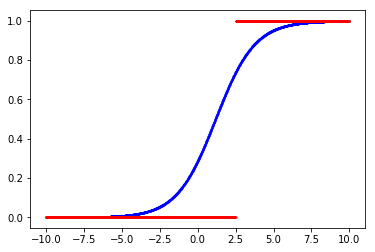

In [24]:
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    
    loss_col = []
    
    for i in range(1000):
        _, _loss = sess.run([train_op, loss], feed_dict={x: data, y_: label})
        loss_col.append(_loss)
                
        _pred = sess.run(pred, feed_dict={x: data})
        
        if i%100 == 0:
            print("loss: ", _loss)
            print("prediction: ", _pred)
            #print("label data: ", y_, ", pred data: ", _pred)
        
    #plt.plot(_pred, 'g')    
    plt.scatter(data, _pred, 1, 'b')
    plt.scatter(data, label, 1, 'r')
    plt.show()

            